In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
movie_df = pd.read_csv(f"C:\\Users\\DELL\\Downloads\\IMDB MOVIE\\IMDB DATASET.csv")

In [4]:
movie_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
X = movie_df['review']
y = movie_df['sentiment']

In [20]:
count = CountVectorizer()
Vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X = Vectorizer.fit_transform(movie_df['review'])
tfidf_score = dict(zip(Vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

In [27]:
print(tfidf_score)

{'10': np.float64(1416.2310009191463), 'acting': np.float64(1915.6953236796444), 'action': np.float64(1136.8769146695), 'actors': np.float64(1468.7403940129602), 'actually': np.float64(1277.0662039927279), 'away': np.float64(938.2214091097466), 'bad': np.float64(2420.533349376063), 'best': np.float64(1855.0996709637861), 'better': np.float64(1693.189329990502), 'big': np.float64(1145.9248050441684), 'bit': np.float64(1014.1555257162761), 'br': np.float64(14022.99482984256), 'cast': np.float64(1323.2807720496107), 'character': np.float64(1837.5392750259834), 'characters': np.float64(1970.5937399160898), 'come': np.float64(1038.1501253149552), 'comedy': np.float64(1232.1235159627581), 'did': np.float64(1772.9583640710396), 'didn': np.float64(1337.825829706604), 'director': np.float64(1351.0073738523604), 'does': np.float64(1608.077516276121), 'doesn': np.float64(1292.4010172788344), 'don': np.float64(2214.0407972613075), 'end': np.float64(1579.465450949165), 'fact': np.float64(1076.93083

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = log.predict(X_test)

In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    negative       0.72      0.73      0.72      4926
    positive       0.73      0.73      0.73      5074

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [28]:
print(confusion_matrix(y_pred, y_test))

[[3580 1346]
 [1381 3693]]


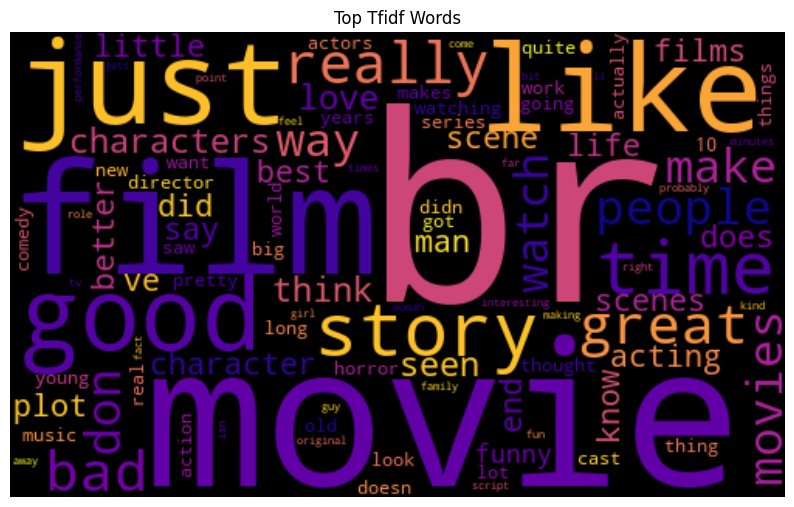

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=300, background_color='black', colormap='plasma')
wordcloud = wordcloud.generate_from_frequencies(tfidf_score)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Tfidf Words")
plt.show()